In [11]:
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [12]:
def f(x):
    return 3*x**2 + 4*x + 5

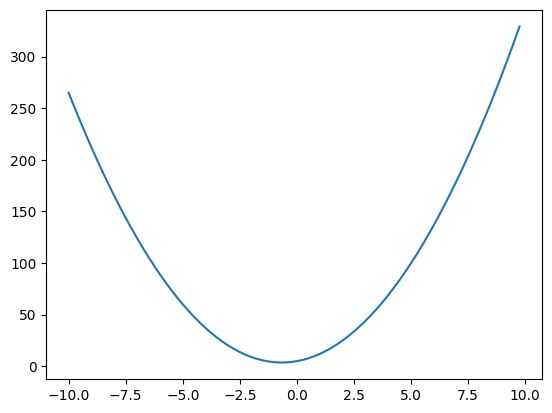

In [13]:
xs = np.arange(-10, 10, 0.25)
ys = f(xs)
plt.plot(xs, ys)

# Derivative
Devrivative of a function `f(x)` is a measure how sensitive it is to any change in `x`

Following is the definiation of a derivative

In [14]:
x = 3
h = 0.0001
slope = (f(x+h) - f(x)) / h
slope

22.000300000044604

In [15]:
h = 0.0001

# complex example
a = 2.0
b = -3.0
c = 10
d = a*b + c

# derivative of d wrt a
d1 = a*b + c
a += h
d2 = a*b + c
slop = (d2 - d1) / h
print(slop)



-3.000000000010772


# Let's build micrograd

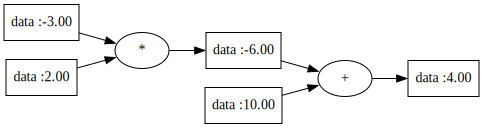

In [18]:

from graphviz import Digraph

class Value:
    def __init__(self, data, children=(), operation=''):
        self.data = data

        # keep track of what contributed to this value
        self._prev = set(children)

        # what was the operation between the children to get this value
        self._operation = operation

    def __repr__(self):
        return f"Value({self.data})"

    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')

    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*')


    def _trace(self):
        nodes, edges = set(), set()

        def _traverse(node):
            if node in nodes:
                return

            nodes.add(node)
            for prev in node._prev:
                edges.add((prev, node))
                _traverse(prev)

        _traverse(self)
        return nodes, edges

    def graph(self):
        dot = Digraph(format='svg',graph_attr={'rankdir':'LR'}) # LR = left to right
        nodes, edges = self._trace()

        for node in nodes:
            uid = str(id(node))
            # for value create a rectangle
            dot.node(uid, label=f"data :{node.data:.2f}",  shape='record')

            # create a node for the operation
            if node._operation:
                dot.node(name=uid + node._operation, label=node._operation)
                dot.edge(uid + node._operation, uid)

        for src, dst in edges:
            dot.edge(str(id(src)), str(id(dst)) + dst._operation)

        return dot






a = Value(2.0)
b = Value(-3.0)
c = Value(10)
d = a*b + c

d.graph()